## Superfund cleanups and near-port community composition for Seattle 

Ashli Blow 
The new working notebook is named "Seattle", and Seattle Draft V1, Seattle Draft V2, and Seattle Draft V3 are reference notebooks. 

### Import Data & Packages

In [2]:
import os
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import xyzservices.providers as xyz

In [3]:
#%matplotlib widget

In [4]:
datadir = '/home/jovyan/superfund-gentrification/superfund-gentrification/Data'
fixed_fn = '/home/jovyan/superfund-gentrification/Data/fixed_effects.csv'
socio_stand_fn = '/home/jovyan/superfund-gentrification/Data/socio_characteristics_nominal_west_coast.csv'
socio_nom_fn = '/home/jovyan/superfund-gentrification/Data/socio_characteristics_standardized_west_coast.csv'

In [5]:
print("Fixed Effects Data:", fixed_fn)
print("Socioeconomic Data - Standard:", socio_stand_fn)
print("Socioeconomic Data - Nomnial:", socio_nom_fn)

Fixed Effects Data: /home/jovyan/superfund-gentrification/Data/fixed_effects.csv
Socioeconomic Data - Standard: /home/jovyan/superfund-gentrification/Data/socio_characteristics_nominal_west_coast.csv
Socioeconomic Data - Nomnial: /home/jovyan/superfund-gentrification/Data/socio_characteristics_standardized_west_coast.csv


### Fixed Effects DataFrame

In [6]:
fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,"Oconomowoc Electroplating Co., Inc.",31.86,Wisconsin,Dodge,Ashippun,573 Oak St,53003.0,43.214100,-88.522100,55.0,...,961500.0,5.502796e+10,NPL Site,In Process,0,0,0,0,0,POINT (2053565.558 445284.543)
1743,Penta Wood Products,50.00,Wisconsin,Burnett,Daniels,Daniels 70,54872.0,45.784508,-92.431204,55.0,...,970800.0,5.501397e+10,NPL Site,In Process,0,0,0,0,0,POINT (1677150.060 636047.765)
1744,F.E. Warren Air Force Base,39.23,Wyoming,Laramie,Cheyenne,Ft Warren Ave,82001.0,41.156669,-104.862200,56.0,...,1100.0,5.602100e+10,NPL Site,In Process,0,0,0,0,0,POINT (785213.296 -50999.019)
1745,Mystery Bridge Rd/U.S. Highway 20,32.10,Wyoming,Natrona,Evansville,Broomtail Trl,82636.0,42.860581,-106.228800,56.0,...,1801.0,5.602500e+10,Deleted NPL Site,Completed,1,0,0,1,1,POINT (653765.704 126560.897)


In [6]:
fixed_df = pd.read_csv(fixed_fn)
aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'
fixed_gdf = gpd.GeoDataFrame(fixed_df, crs='EPSG:4326', geometry=gpd.points_from_xy(fixed_df['lon'], fixed_df['lat']))
fixed_gdf_aea = fixed_gdf.to_crs(aea_proj_str)
fixed_gdf_aea.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1,POINT (2500797.782 -855198.329)
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500633.447 -836762.935)
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,5704.0,1.103006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2504565.873 -426248.662)
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2500091.552 -836295.442)
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,6000.0,1.101006e+09,NPL Site,In Process,0,0,0,0,0,POINT (2602153.612 -641411.339)


### States DataFrame

In [7]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

idx = states_gdf['NAME'].isin(['Alaska','Puerto Rico','Hawaii'])
states_gdf = states_gdf[~idx]

aea_proj_str = '+proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 +lon_0=-114.27'

aea_crs = fixed_gdf_aea.crs
aea_crs

states_gdf_aea = states_gdf.to_crs(aea_crs)
states_gdf_aea.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((154103.502 -554865.569, 154463.722 -..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((1886491.098 -773607.886, 1884937.544..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-715337.404 -425936.004, -7153..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((676361.242 -79930.861, 687165.323 -7..."


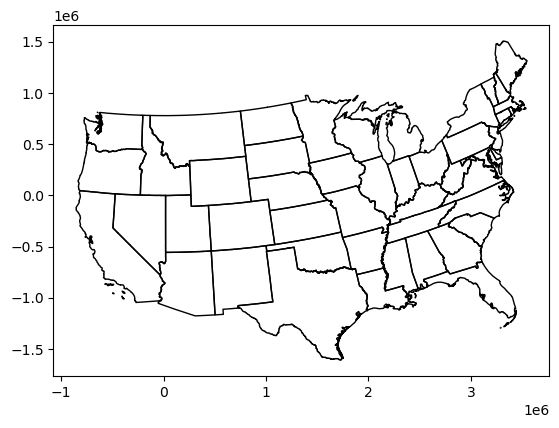

In [8]:
states_gdf_aea.plot(facecolor='none', edgecolor='k')
plt.show()

## Combine & Overlay DataFrames

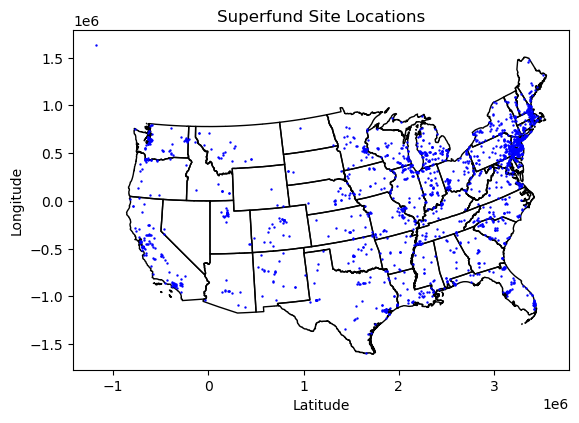

In [9]:
f, ax = plt.subplots()

states_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
fixed_gdf_aea.plot(ax=ax, marker='o', color='blue', markersize=.5, label='Sites')

plt.title('Superfund Site Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()

In [10]:
fixed_gdf_aea_states = gpd.sjoin(fixed_gdf_aea, states_gdf_aea)
fixed_gdf_aea_states.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,cercla2000,cercla2010,cercla2020,geometry,index_right,GEO_ID,STATE,NAME,LSAD,CENSUSAREA
0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,Saraland,Craig Dr,36571.0,30.808331,-88.073061,1.0,...,0,1,1,POINT (2500797.782 -855198.329),0,0400000US01,01,Alabama,,50645.326
1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,Axis,US 43,36560.0,30.969439,-88.017500,1.0,...,0,0,0,POINT (2500633.447 -836762.935),0,0400000US01,01,Alabama,,50645.326
2,Triana/Tennessee River,61.42,Alabama,"Limestone, Madison, Morgan","Limestone, Morgan",Signal Point Dr,35754.0,34.508888,-86.638194,1.0,...,0,0,0,POINT (2504565.873 -426248.662),0,0400000US01,01,Alabama,,50645.326
3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,Bucks,US 43,36560.0,30.975000,-88.021389,1.0,...,0,0,0,POINT (2500091.552 -836295.442),0,0400000US01,01,Alabama,,50645.326
4,T.H. Agriculture & Nutrition Co. (Montgomery P...,44.46,Alabama,Montgomery,Montgomery,Birmingham Hwy,36108.0,32.376100,-86.379100,1.0,...,0,0,0,POINT (2602153.612 -641411.339),0,0400000US01,01,Alabama,,50645.326


In [11]:
fixed_gdf_aea_states = gpd.sjoin(states_gdf_aea, fixed_gdf_aea)
fixed_gdf_aea_states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,index_right,site,sitescore,state,...,county_fips,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,...,1097.0,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,...,1097.0,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,...,1097.0,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",5,Perdido Ground Water Contamination,30.29,Alabama,...,1003.0,10200.0,1.003010e+09,Deleted NPL Site,Completed,1,0,0,1,1
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",12,Olin Corp. (McIntosh Plant),39.71,Alabama,...,1129.0,44200.0,1.129044e+09,NPL Site,In Process,0,0,0,0,0


In [12]:
columns_to_drop = ['CENSUSAREA']
fixed_gdf_aea_states = fixed_gdf_aea_states.drop(columns=columns_to_drop)

In [13]:
fixed_gdf_aea_states.head()

,GEO_ID,STATE,NAME,LSAD,geometry,index_right,site,sitescore,state,county,...,county_fips,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020
0,0400000US01,01,Alabama,,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",0,"Redwing Carriers, Inc. (Saraland)",30.83,Alabama,Mobile,...,1097.0,5400.0,1.097005e+09,Deleted NPL Site,Completed,1,0,0,1,1
0,0400000US01,01,Alabama,,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",1,Stauffer Chemical Co. (LeMoyne Plant),32.34,Alabama,Mobile,...,1097.0,5702.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0
0,0400000US01,01,Alabama,,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",3,Stauffer Chemical Co. (Cold Creek Plant),46.77,Alabama,Mobile,...,1097.0,5800.0,1.097006e+09,NPL Site,In Process,0,0,0,0,0
0,0400000US01,01,Alabama,,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",5,Perdido Ground Water Contamination,30.29,Alabama,Baldwin,...,1003.0,10200.0,1.003010e+09,Deleted NPL Site,Completed,1,0,0,1,1
0,0400000US01,01,Alabama,,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",12,Olin Corp. (McIntosh Plant),39.71,Alabama,Washington,...,1129.0,44200.0,1.129044e+09,NPL Site,In Process,0,0,0,0,0


In [14]:
print(f"Original count: {fixed_gdf_aea.shape[0]}")
print(f"Joined count: {fixed_gdf_aea_states.shape[0]}")

Original count: 1747
Joined count: 1741


In [15]:
fixed_gdf_aea_states_agg = fixed_gdf_aea_states.groupby('NAME')['site'].agg(['count'])
fixed_gdf_aea_states_agg.head()

,count
NAME,
Alabama,15
Arizona,12
Arkansas,17
California,113
Colorado,23


In [16]:
states_gdf_aea_merge = states_gdf_aea.merge(fixed_gdf_aea_states_agg, on='NAME')
states_gdf_aea_merge.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,count
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((2513208.515 -911433.707, 25175...",15
1,0400000US04,04,Arizona,,113594.084,"POLYGON ((154103.502 -554865.569, 154463.722 -...",12
2,0400000US05,05,Arkansas,,52035.477,"POLYGON ((1886491.098 -773607.886, 1884937.544...",17
3,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-715337.404 -425936.004, -7153...",113
4,0400000US08,08,Colorado,,103641.888,"POLYGON ((676361.242 -79930.861, 687165.323 -7...",23


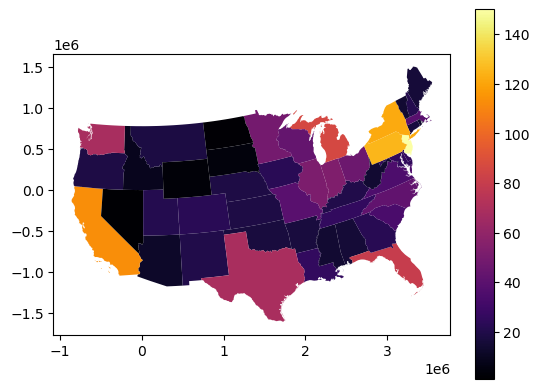

In [17]:
states_gdf_aea_merge.plot('count', legend=True, cmap='inferno');

### Washington 

In [18]:
wa_gdf = states_gdf_aea[states_gdf_aea['NAME'] == 'Washington']
wa_geom = wa_gdf.squeeze().geometry

In [19]:
idx = fixed_gdf_aea.intersects(wa_geom)
fixed_gdf_aea_wa = fixed_gdf_aea.loc[idx]

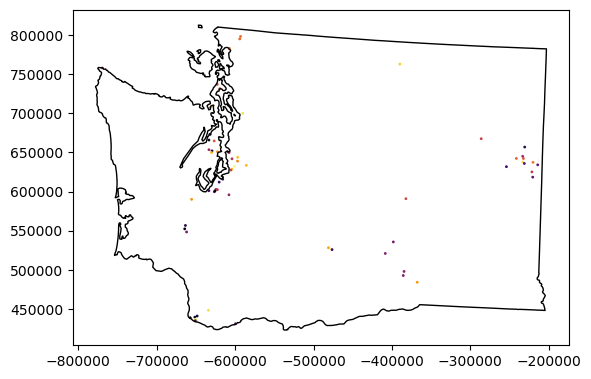

In [20]:
ax = fixed_gdf_aea_wa.plot(column='site', cmap='inferno', markersize=1)
ax = wa_gdf.plot(ax=ax, facecolor='none', edgecolor='black')

In [21]:
print=('fixed_gdf_aea_wa')

### Seattle

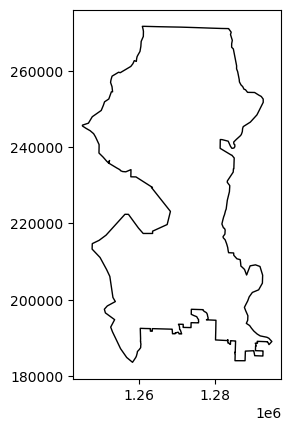

In [31]:
sea_fn = '/home/jovyan/superfund-gentrification/Data/Seattle_Area_Polygon_-142470933516081067.geojson'
sea_gdf = gpd.read_file(sea_fn)
sea_gdf.plot(facecolor='none', edgecolor='k')
plt.show()

In [23]:
#sea_gdf = gpd.read_file('https://raw.githubusercontent.com/seattleflu/seattle-geojson/master/seattle_geojsons/2016_seattle_city.geojson', engine='pyogrio')
#sea_gdf.head()

,STATEFP,COUNTYF,TRACTCE,AFFGEOI,GEOID,NAME,LSAD,ALAND,AWATER,rowID,CRA_NAM,NEIGHBO,PUMA5CE,geometry
0,1400000US53033000200,033,000200,1400000US53033000200,53033000200,2,CT,3286278,0,1,Olympic Hills/Victory Heights,North,11602,"POLYGON ((-122.24032 47.51987, -122.23570 47.5..."


In [ ]:
#sea_gdf = sea_gdf.to_crs('EPSG:32610')
#error of mismatch

In [46]:
fixed_gdf_aea_sea =fixed_gdf_aea_wa.clip(sea_gdf.geometry)
fixed_gdf_aea_sea.head()

,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry


In [40]:
sea_geom = sea_gdf.squeeze().geometry

In [32]:
idx = fixed_gdf_aea.intersects(sea_gdf)
fixed_gdf_aea_sea = fixed_gdf_aea.loc[idx]
fixed_gdf_aea_sea.head()

/tmp/ipykernel_2080/3043904094.py:1: UserWarning: The indices of the two GeoSeries are different.
  idx = fixed_gdf_aea.intersects(sea_gdf)
/tmp/ipykernel_2080/3043904094.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +proj=aea +lat_1=37.00 +lat_2=47.00 +lat_0=42.00 + ...
Right CRS: EPSG:2926

  idx = fixed_gdf_aea.intersects(sea_gdf)


,site,sitescore,state,county,city,street,zip,lat,lon,state_fips,...,tracts,tract_fips,status_epa,states_plaintalk,status_binary,cercla1990,cercla2000,cercla2010,cercla2020,geometry


In [22]:
sea_fn = '/home/jovyan/superfund-gentrification/Data/Seattle_Area_Polygon_-142470933516081067.geojson'
sea_gdf = gpd.read_file(sea_fn)

sea_gdf_aea = sea_gdf.to_crs(aea_crs)
sea_gdf_aea_clipped = gpd.clip(fixed_gdf_aea, sea_gdf_aea)

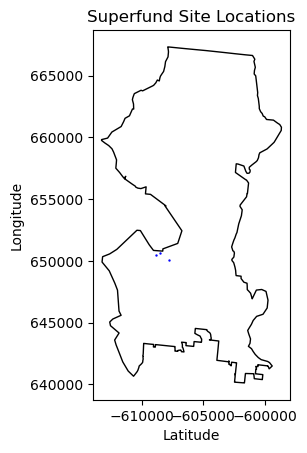

In [23]:
f, ax = plt.subplots()

sea_gdf_aea.plot(ax=ax, facecolor='none', edgecolor='k')
sea_gdf_aea_clipped.plot(ax=ax, marker='o', color='blue', markersize=.5, label='Sites')

plt.title('Superfund Site Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show() 

## Questions

- Question about drop when SJOIN: I want to confirm it is similar to lab: The excluded points are all near the coasline and fall just outside of the state polygons we're using here. 
- Is there another public states_url I can use that isn't Eric's?(states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json) 